In [1]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import os
import numpy
import cv2
import pandas as pd

In [2]:
dataset_dir = "archive/105_classes_pins_dataset"  # path to your dataset folder

img_height = 144
img_width = 144
batch_size = 16

train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,   # 80% train, 20% validation
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale"
)

val_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode="grayscale"
)

Found 17534 files belonging to 105 classes.
Using 14028 files for training.
Found 17534 files belonging to 105 classes.
Using 3506 files for validation.


In [3]:
class_names = train_ds.class_names
num_classes=len(class_names)
print("Classes found:", class_names)
print(len(class_names))

Classes found: ['pins_Adriana Lima', 'pins_Alex Lawther', 'pins_Alexandra Daddario', 'pins_Alvaro Morte', 'pins_Amanda Crew', 'pins_Andy Samberg', 'pins_Anne Hathaway', 'pins_Anthony Mackie', 'pins_Avril Lavigne', 'pins_Ben Affleck', 'pins_Bill Gates', 'pins_Bobby Morley', 'pins_Brenton Thwaites', 'pins_Brian J. Smith', 'pins_Brie Larson', 'pins_Chris Evans', 'pins_Chris Hemsworth', 'pins_Chris Pratt', 'pins_Christian Bale', 'pins_Cristiano Ronaldo', 'pins_Danielle Panabaker', 'pins_Dominic Purcell', 'pins_Dwayne Johnson', 'pins_Eliza Taylor', 'pins_Elizabeth Lail', 'pins_Emilia Clarke', 'pins_Emma Stone', 'pins_Emma Watson', 'pins_Gwyneth Paltrow', 'pins_Henry Cavil', 'pins_Hugh Jackman', 'pins_Inbar Lavi', 'pins_Irina Shayk', 'pins_Jake Mcdorman', 'pins_Jason Momoa', 'pins_Jennifer Lawrence', 'pins_Jeremy Renner', 'pins_Jessica Barden', 'pins_Jimmy Fallon', 'pins_Johnny Depp', 'pins_Josh Radnor', 'pins_Katharine Mcphee', 'pins_Katherine Langford', 'pins_Keanu Reeves', 'pins_Krysten R

In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ---------------------------
# 3. Normalize Images
# ---------------------------
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))



In [5]:
# train_salman=os.listdir("Training/Salman")
# train_shahrukh=os.listdir("Training/Shahrukh")
# testing_=os.listdir("Testing")
# def preprocess_image(filepath):
#     img=cv2.imread(filepath)
#     img=cv2.resize(img,(150,150))
#     gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     print(type(gray),gray.shape)
#     return gray

In [6]:
# training=[]
# output=[]
# testing=[]
# for i in train_salman:
#     training.append(preprocess_image(f"Training/Salman/{i}"))
#     output.append("salman")
# for i in train_shahrukh:
#     training.append(preprocess_image(f"Training/Shahrukh/{i}"))
#     output.append("shahrukh")
# for i in testing_:
#     testing.append(preprocess_image(f"Testing/{i}"))
    

In [7]:
# training=numpy.array(training)


In [8]:
# mapper={"salman":0,"shahrukh":1}
# output=pd.Series(output).map(mapper)

In [9]:
# training

In [10]:
# output

In [11]:


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(144, 144, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(num_classes, activation='softmax')  # Output layer
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [13]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
)

Epoch 1/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 391s 374ms/step - accuracy: 0.0145 - loss: 4.6517 - val_accuracy: 0.0422 - val_loss: 4.4048
Epoch 2/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 327s 373ms/step - accuracy: 0.0522 - loss: 4.2785 - val_accuracy: 0.0958 - val_loss: 3.9488
Epoch 3/50
877/877 ━━━━━━━━━━━━━━━━━━━━ 299s 341ms/step - accuracy: 0.1028 - loss: 3.7997 - val_accuracy: 0.1272 - val_loss: 3.7585
Epoch 4/50
247/877 ━━━━━━━━━━━━━━━━━━━━ 3:45 358ms/step - accuracy: 0.1716 - loss: 3.4352

KeyboardInterrupt: 

In [ ]:
loss, acc = model.evaluate(val_ds, verbose=2)
print(f"\nValidation Accuracy: {acc*100:.2f}%")

ValueError: Exception encountered when calling Conv2D.call().

[1mNegative dimension size caused by subtracting 3 from 2 for '{{node sequential_4_1/conv2d_21_1/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_4_1/max_pooling2d_20_1/MaxPool2d, sequential_4_1/conv2d_21_1/convolution/ReadVariableOp)' with input shapes: [?,2,2,128], [3,3,128,128].[0m

Arguments received by Conv2D.call():
  • inputs=tf.Tensor(shape=(None, 2, 2, 128), dtype=float32)

In [ ]:
# print(testing)

[array([[190, 184, 180, ..., 153, 155, 155],
       [177, 180, 183, ..., 147, 149, 147],
       [181, 187, 190, ..., 147, 145, 148],
       ...,
       [211, 232, 163, ...,  11,   6,   5],
       [212, 218, 198, ...,   4,   8,   7],
       [224, 181, 229, ...,   6,  10,   7]], shape=(150, 150), dtype=uint8), array([[156, 156, 156, ...,  72,  71,  71],
       [156, 156, 156, ...,  72,  71,  71],
       [156, 156, 156, ...,  72,  71,  71],
       ...,
       [107, 107, 107, ...,  19,  18,  18],
       [100, 100, 100, ...,  19,  18,  18],
       [ 95,  95,  95, ...,  19,  18,  18]], shape=(150, 150), dtype=uint8), array([[218, 218, 218, ..., 218, 218, 218],
       [218, 218, 218, ..., 218, 218, 218],
       [218, 218, 218, ..., 218, 218, 218],
       ...,
       [218, 218, 218, ..., 218, 218, 218],
       [218, 218, 218, ..., 218, 218, 218],
       [218, 218, 218, ..., 218, 218, 218]], shape=(150, 150), dtype=uint8), array([[250, 250, 251, ..., 152, 151, 149],
       [249, 250, 250, ..., 

In [ ]:
# for i in testing:
#     i = numpy.expand_dims(i, axis=0)
#     print(numpy.max(model.predict(i)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1.0


In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import regularizers

# Load dataset (MNIST digits)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Reshape data to fit CNN: (samples, height, width, channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype("float32") / 255.0

# Build CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),kernel_regularizer=regularizers.l2(0.001))),
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=20,steps_per_epoch=5000,
                    validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 80s 15ms/step - accuracy: 0.8605 - loss: 0.6031 - val_accuracy: 0.9805 - val_loss: 0.1952
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 68s 14ms/step - accuracy: 0.9686 - loss: 0.2395 - val_accuracy: 0.9823 - val_loss: 0.1699
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 74s 15ms/step - accuracy: 0.9730 - loss: 0.2060 - val_accuracy: 0.9849 - val_loss: 0.1508
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 96s 19ms/step - accuracy: 0.9760 - loss: 0.1857 - val_accuracy: 0.9864 - val_loss: 0.1349
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 79s 16ms/step - accuracy: 0.9771 - loss: 0.1758 - val_accuracy: 0.9881 - val_loss: 0.1289
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 106s 21ms/step - accuracy: 0.9784 - loss: 0.1662 - val_accuracy: 0.9856 - val_loss: 0.1287
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 98s 20ms/step - accuracy: 0.9796 - loss: 0.1608 - val_accuracy: 0.9850 - val_loss: 0.1352
Epoch 8/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 73s 15ms/step - accuracy: 0.9803 

KeyboardInterrupt: 

In [ ]:
import numpy as np

# Load multi-digit image
img = cv2.imread("test/six.png", cv2.IMREAD_GRAYSCALE)
_, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# Find contours (digit regions)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    digit = thresh[y:y+h, x:x+w]
    digit = cv2.resize(digit, (28, 28)) / 255.0
    digit = digit.reshape(1, 28, 28, 1)

    pred = model.predict(digit)
    print("Predicted digit:", np.argmax(pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
Predicted digit: 3


(148, 179)


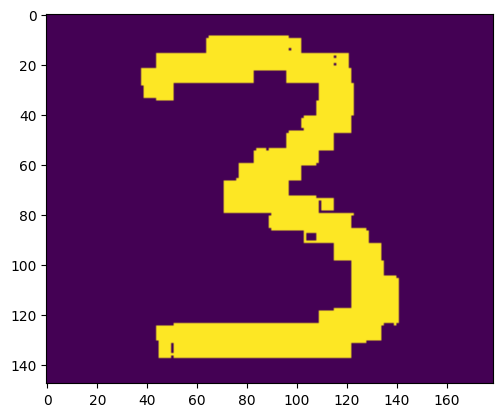

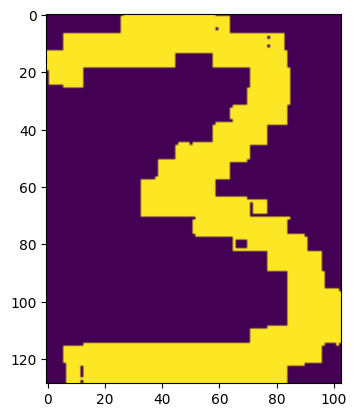

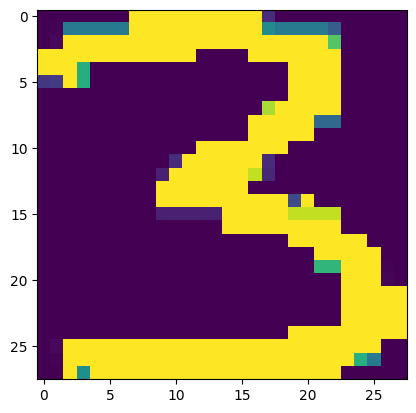

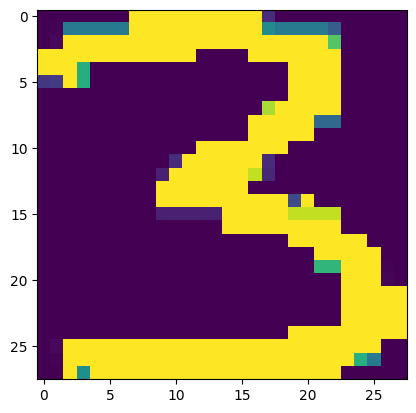

3


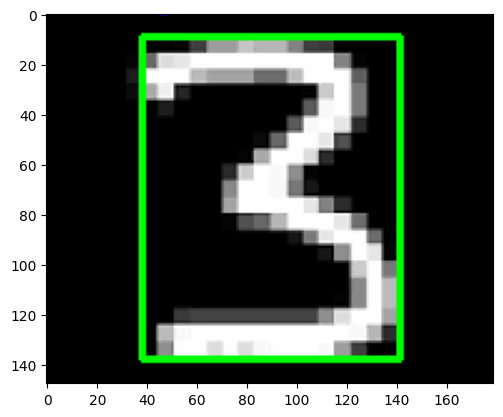

In [ ]:
# import cv2
# import numpy as np
# from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load test image with multiple digits
img = cv2.imread("test/six.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # for drawing colored boxes

# Preprocess: threshold
_, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)
plt.show()
# Find contours (each contour = a digit region)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    # Get bounding box
    x, y, w, h = cv2.boundingRect(cnt)

    # Extract digit region
    digit = thresh[y:y+h, x:x+w]
    plt.imshow(digit)
    plt.show()
    # Resize to 28x28 (MNIST format)
    digit = cv2.resize(digit, (28, 28))
    plt.imshow(digit)
    plt.show()
    digit = digit.astype("float32") / 255.0
    plt.imshow(digit)
    plt.show()
    digit = digit.reshape(1, 28, 28, 1)
    # plt.imshow(np.squeeze(digit),cmap="gray")
    # plt.show()
    # Predict using CNN
    pred = model.predict(digit, verbose=0)
    label = np.argmax(pred)
    print(label)

    # Draw bounding box + label
    cv2.rectangle(output, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(output, str(label), (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

# Save and show result
cv2.imwrite("digit_detection.png", output)
plt.imshow(output)
plt.show()
